## Model: Responsible Business Simulator (RBS)
In this notebook the core (calculation) steps of the RBS model are illustrated.

### `TheResponsibleBusinessSimulator` class
In order to work with the Responsible Business Simulator model, we will work with the ```TheResponsibleBusinessSimulator``` class. This class can be found in **core/tRBS.py**. This class takes three input values: (i) the name of the case, (ii) the format of the data (xlsx, json, csv) and (iii) the folder where data of the case can be found.

In [1]:
from pathlib import Path
from core.trbs import TheResponsibleBusinessSimulator

name = 'Beerwiser'
file_format = 'xlsx'
path = Path.cwd() / 'data' / 'beerwiser'

case = TheResponsibleBusinessSimulator(name, file_format, path)

Let's see how ```case``` looks currently:

In [2]:
print(case)

Case: Beerwiser (xlsx) 
Data location: /Users/tdijk004/Documents/tRBS/open source/trbs/model/data/beerwiser 
Input data: 
 First .build() a case to import data


Currently, it is rather empty. To get the input data, we will first need to ```build``` our case.

In [3]:
case.build()
print(case)

Creating 'Beerwiser'
Case: Beerwiser (xlsx) 
Data location: /Users/tdijk004/Documents/tRBS/open source/trbs/model/data/beerwiser 
Input data: 
 configurations
	['use_theme_weights']

configuration_value
	[0]

key_outputs
	['Accidents reduction' 'Water use reduction' 'Production cost reduction']

key_output_unit
	['#/year' 'hl/year' '%']

key_output_theme
	['People' 'Planet' 'Profit']

themes
	['People' 'Planet' 'Profit']

key_output_minimum
	[nan nan nan]

key_output_maximum
	[nan nan nan]

key_output_monetary
	[0 0 0]

key_output_smaller_the_better
	[0 0 0]

key_output_linear
	[1 1 0]

key_output_automatic
	[1 1 1]

key_output_start
	[nan nan nan]

key_output_end
	[nan nan nan]

key_output_threshold
	[nan nan nan]

decision_makers_options
	['Equal spread' 'Focus on training' 'Focus on water recycling']

internal_variable_inputs
	['Invest in training of employees' 'Invest in water recycling']

decision_makers_option_value
	[[150000 150000]
 [250000  50000]
 [ 50000 250000]]

scenarios


### Calculate key output values
Now that we have a decent set-up of our case, we can `evaluate` it. Cases are evaluated using the following iterative four-step proces. 
1. `evaluate_single_dependency` is the smallest calculation step. It takes both arguments from a **single dependency row** and applies the provided operator. This is calculated for a fixed decision makers option and fixed scenario. <br>
_e.g. this function will calculate 'Effect of training' as 'Investment' / 'Effectiveness'. The fixed decision makers option and fixed scenario is used (when needed) to find the correct values for the internal ('Investment') and external variables ('Effectivess')._
<br>

2. `evaluate_all_dependencies` calculates all singular calculated dependencies to evaluate the full outcome for a case for a fixed decision makers option and fixed scenario. <br>
_e.g. this function will calculate the values of the key outputs (and intermediate values) for the 'Base case' with a 'Focus on water recycling'._
<br>

3. `evaluate_selected_scenario` calculates all full outcomes for a case for **all decision makers option** and single given scenario. <br>
_e.g. this function will calculate a set of values of the key outputs (and intermediate values) for the 'Base case' for each option that is available to the decision makers, that is, one set for 'Focus on water recycling', one set for 'Focus on training' and one set for 'Equal spread'._
<br>

4. `evaluate_all_scenarios` calculates all sets of key output values for **all decision makers options** and **all scenarios**. 

The process is iterative. So, when calling `evaluate` step 4 is called that will call the other functions. This process is visualised below:

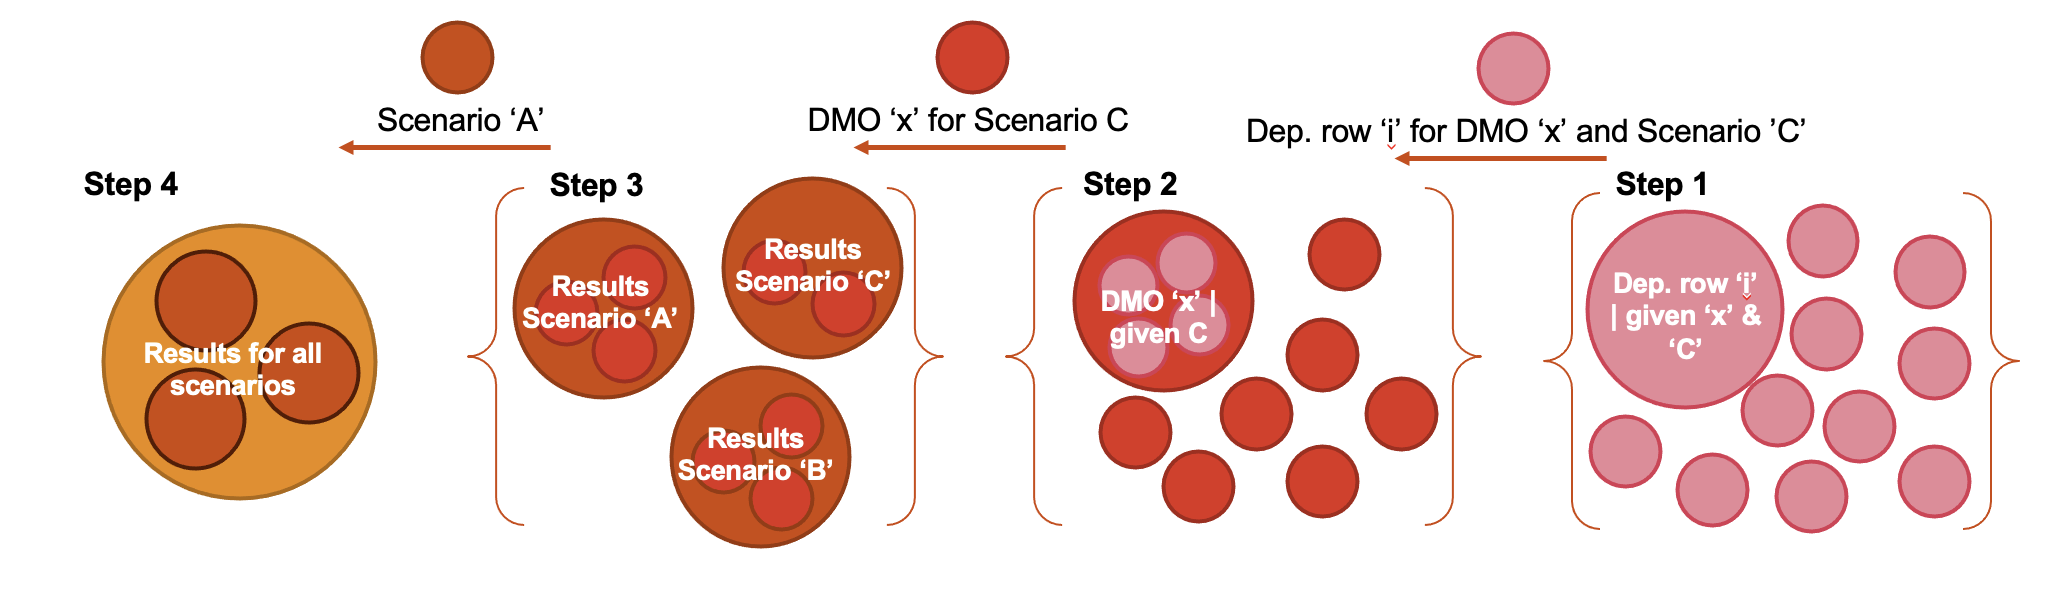

In [4]:
case.evaluate()

- Evaluated 'Base case' successfully for all decision makers options!
- Evaluated 'Optimistic' successfully for all decision makers options!
- Evaluated 'Pessimistic' successfully for all decision makers options!


The `evaluate` function creates an output dictionary (`output_dict`) for our `case`. This dictionary contains all the results of our case and is structured as a nested dictionary with the following structure: 

{'Scenario A': <br>
   { <br>
    'Decision Maker Option I': <br>
        {<br>
        'key_outputs': {'Key Output X': value, ..}<br>
        }<br>
    'Decision Maker Option II': {..}<br>
    }<br>
'Scenario B': {..}<br>
}

In [5]:
case.output_dict['Base case']

{'Equal spread': {'key_outputs': {'Accidents reduction': 10.4652,
   'Water use reduction': 4009090.909090909,
   'Production cost reduction': 0.047657672727272726}},
 'Focus on training': {'key_outputs': {'Accidents reduction': 17.442,
   'Water use reduction': 1336363.6363636365,
   'Production cost reduction': 0.043793090909090907}},
 'Focus on water recycling': {'key_outputs': {'Accidents reduction': 3.4883999999999995,
   'Water use reduction': 6681818.181818182,
   'Production cost reduction': 0.051522254545454546}}}

### Process key output values
Now that we have evaluated the dependencies, we can start to compare the key outputs. In order to do this we `appreciate` our case. A five-step approach is introduced when appreciating the outputs:
1. `appreciate_single_key_output` transforms a key output value into an **appreciated value**. This is done by a (non)-linear appreciation based on the minimum and maximum values of that specific key output throughout the case (so based on values of key outputs in all scenarios and decision makers options). For each (scenario, decision makers option) combination
<br>

2. `apply_weights` applies theme and key output weights to the calculated appreciations under Step 1. These weights are model inputs determined based on strategic priorities. This function gives us a set of **weighted appreciations** of the key outputs for a each (scenario, decision makers option) combination. 
<br>

3. (**NOT YET IMPLEMENTED**) `decision_makers_option_appreciations` aggregates the weighted appreciations of key outputs into a single **aggregated appreciation** per decision maker option and scenario.
<br>

4. (**NOT YET IMPLEMENTED**) `apply_scenario_weights` applies scenario weights to the calculated appreciation under Step 3. This function gives us a value of **scenario weighted appreciations** for each decision maker option and scenario.
<br>

5. (**NOT YET IMPLEMENTED**) `scenario_appreciations` aggregates the scenario weighted appreciations into a single value for each decision maker option.

In [6]:
case.appreciate()

Key output values have been processed | Appreciated, weighted & aggregated


The `appreciate` functions extends our excisting output dictionary with information about the appreciation & weighted appreciation. The extened structure looks as follows:

{'Scenario A': <br>
   { <br>
    'Decision Maker Option I': <br>
        {<br>
        'key_outputs': {'Key Output X': value, ..}<br>
        **'appreciations': {'Key Output X': value, ..}<br>
        'weighted_appreciations': {'Key Output X': value, ..}**<br>
        }<br>
    'Decision Maker Option II': {..}<br>
    }<br>
'Scenario B': {..}<br>
}

In [7]:
case.output_dict['Base case']

{'Equal spread': {'key_outputs': {'Accidents reduction': 10.4652,
   'Water use reduction': 4009090.909090909,
   'Production cost reduction': 0.047657672727272726},
  'appreciations': {'Accidents reduction': 49.99999999999999,
   'Water use reduction': 49.75609756097561,
   'Production cost reduction': 81.12099305063569},
  'weighted_appreciations': {'Accidents reduction': 16.666666666666664,
   'Water use reduction': 8.292682926829269,
   'Production cost reduction': 40.560496525317845}},
 'Focus on training': {'key_outputs': {'Accidents reduction': 17.442,
   'Water use reduction': 1336363.6363636365,
   'Production cost reduction': 0.043793090909090907},
  'appreciations': {'Accidents reduction': 100.0,
   'Water use reduction': 1.9512195121951232,
   'Production cost reduction': 56.72564870657221},
  'weighted_appreciations': {'Accidents reduction': 33.33333333333333,
   'Water use reduction': 0.32520325203252054,
   'Production cost reduction': 28.362824353286104}},
 'Focus on wa

### Visualization of output
Having evaluated and appreciated the full case, it is time to start creating some visuals. We will do this using the generated `output_dict` and the `visualize` function. This function uses a display format (currently 'table' or 'barchart') and the key of the result as stored in `output_dict` (e.g. `key_outputs` or `weighted_appreciations`).

Visualization are generated using the following rules:

**WORK IN PROGRESS | NOT YET IMPLEMENTED** 
- `table`: 2- or 3-dimensional tables. Rows contain scenario's and/or key outputs (both if 3-dimensional, choose one if 2-dimensional). Columns are decision makers options. 
- `barchart`:
    - 3-dimensional is not possible. Specify a scenario if the `key` in the `output_dict` is associated with three dimensions
    - 1 or 2-dimensional: decision maker options are always on the horizontal axis. For 2-dimensional barchart it can be either `stacked` or `dodged`. 

In [8]:
case.visualize('table', 'key_outputs', scenario='Base case')

,Accidents reduction,Water use reduction,Production cost reduction
Equal spread,10.47,4.0M,0.05
Focus on training,17.44,1.3M,0.04
Focus on water recycling,3.49,6.7M,0.05


Comparing key outputs for each decision makers option can become difficult: the ranges of the three key outputs varies wildly. For better comparisons, we can therefore look at the weighted appreciations:

In [9]:
case.visualize('table', 'weighted_appreciations', scenario='Base case')

,Accidents reduction,Water use reduction,Production cost reduction
Equal spread,16.67,8.29,40.56
Focus on training,33.33,0.33,28.36
Focus on water recycling,-0.00,16.26,48.03


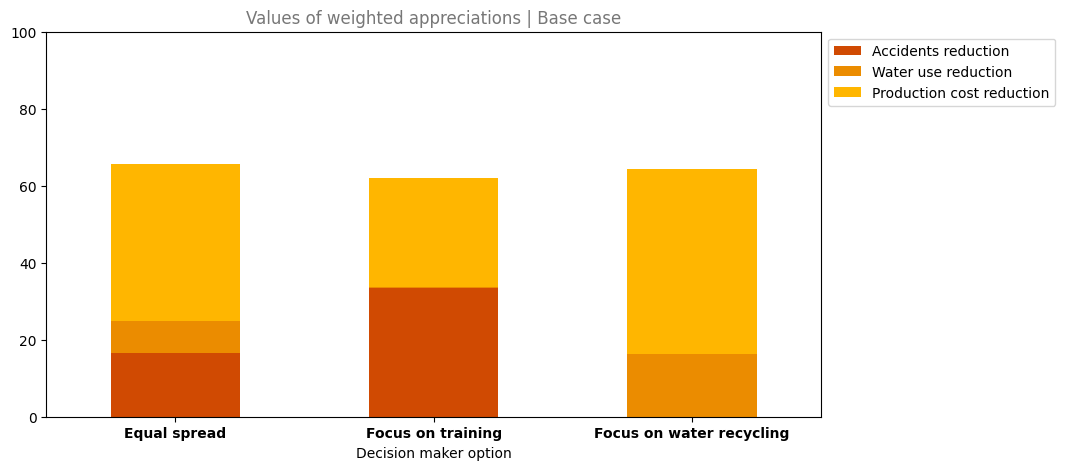

In [10]:
case.visualize('barchart', 'weighted_appreciations', scenario="Base case")